In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

import warnings
warnings.filterwarnings("ignore")

In [47]:
df = pd.read_csv(r"data\StudentsPerformance.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
df.shape # Koliko redova i kolona ima

(1000, 8)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [50]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [51]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

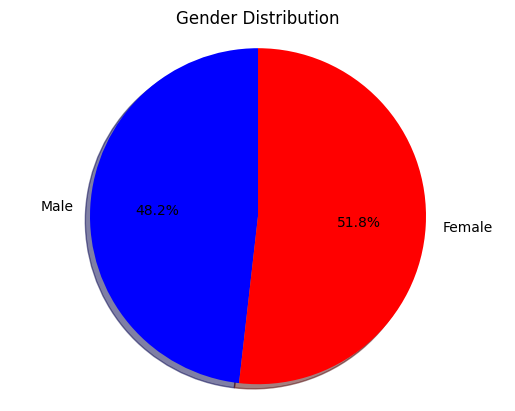

In [54]:
# 5. Gender Distribution  
#We use a pie chart to visualize the proportion of male and female students in the dataset.

male = (df["gender"] == "male").sum()
female = (df["gender"] == "female").sum()


sizes = [male, female]
labels = ["Male", "Female"]
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    colors=["blue", "red"]
)
plt.title("Gender Distribution")
plt.axis('equal')  
plt.show()

In [55]:
df.groupby('gender')['lunch'].value_counts()

gender  lunch       
female  standard        329
        free/reduced    189
male    standard        316
        free/reduced    166
Name: count, dtype: int64

In [56]:
df.groupby('gender')['parental level of education'].value_counts()

gender  parental level of education
female  some college                   118
        associate's degree             116
        high school                     94
        some high school                91
        bachelor's degree               63
        master's degree                 36
male    some college                   108
        associate's degree             106
        high school                    102
        some high school                88
        bachelor's degree               55
        master's degree                 23
Name: count, dtype: int64

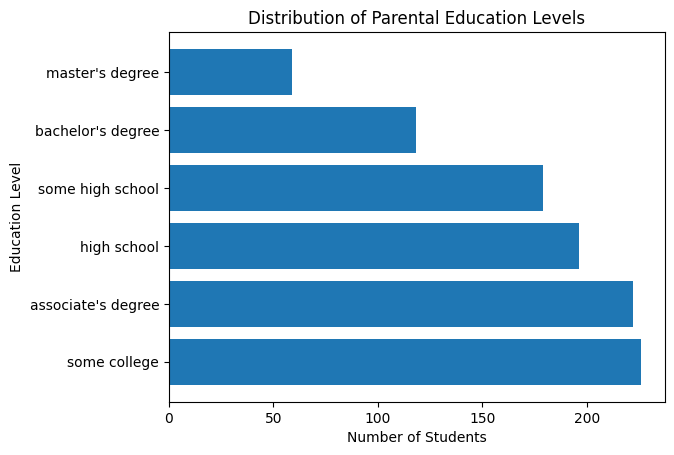

In [57]:
# 6. Parental Education Levels  
# We analyze how the education levels of students' parents are distributed in the dataset.

education_counts = df["parental level of education"].value_counts()
plt.barh(education_counts.index, education_counts.values)
plt.title("Distribution of Parental Education Levels")
plt.xlabel("Number of Students")
plt.ylabel("Education Level")
plt.show()

In [58]:
df.groupby('gender')[['parental level of education','test preparation course','math score']].value_counts()

gender  parental level of education  test preparation course  math score
female  some college                 none                     62            6
        associate's degree           none                     53            5
                                                              65            5
        some college                 none                     58            5
                                                              69            5
                                                                           ..
male    some high school             none                     82            1
                                                              84            1
                                                              88            1
                                                              92            1
                                                              94            1
Name: count, Length: 655, dtype: int64

In [59]:
df.groupby('gender')[['parental level of education','test preparation course','math score']].min()

,parental level of education,test preparation course,math score
gender,,,
female,associate's degree,completed,0
male,associate's degree,completed,27


In [60]:
df.groupby('gender')[['parental level of education','test preparation course','math score']].max()

,parental level of education,test preparation course,math score
gender,,,
female,some high school,none,100
male,some high school,none,100


In [61]:
df['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

In [62]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

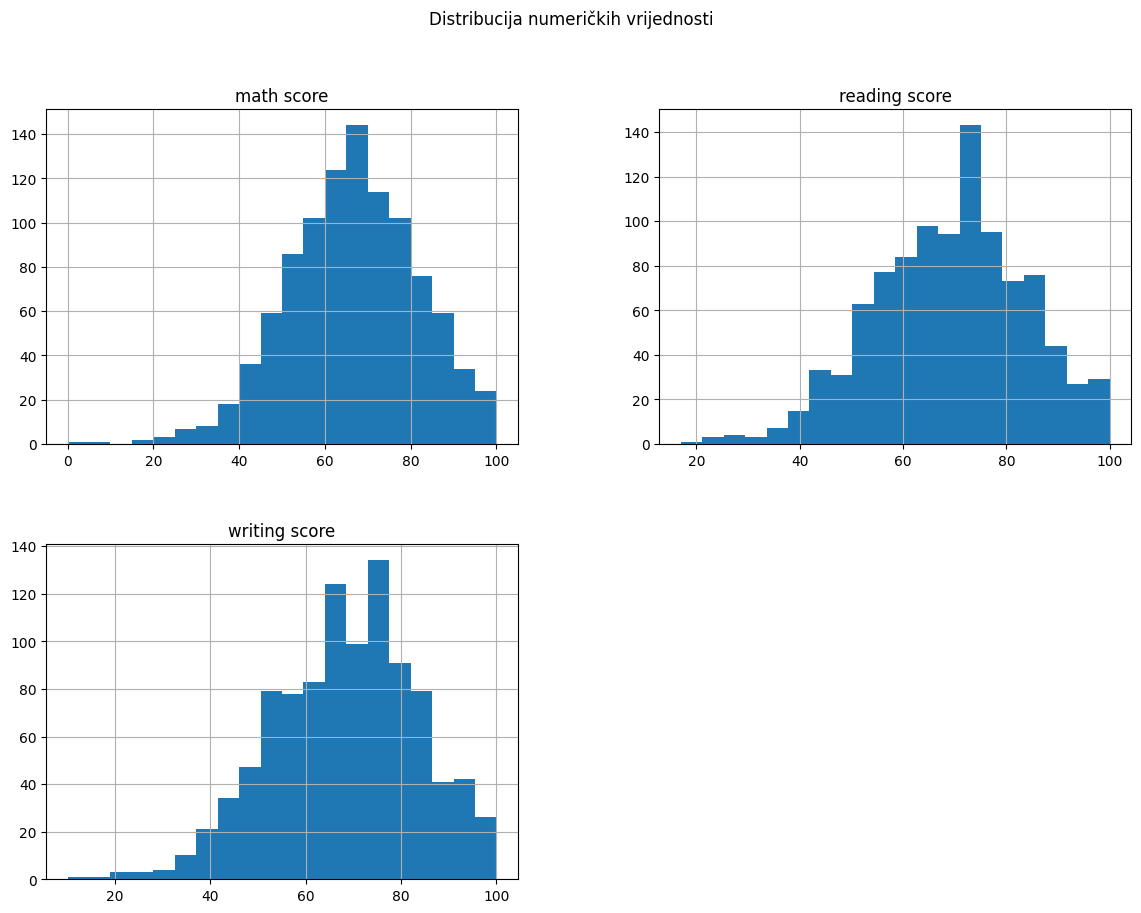

In [63]:
df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribucija numeričkih vrijednosti")
plt.show()

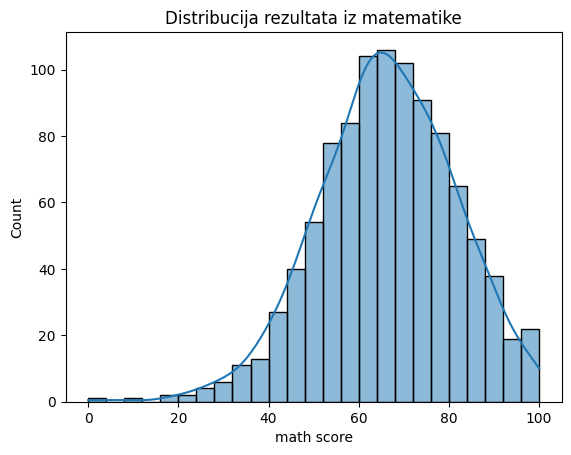

In [64]:
sns.histplot(df["math score"], kde=True)
plt.title("Distribucija rezultata iz matematike")
plt.show()

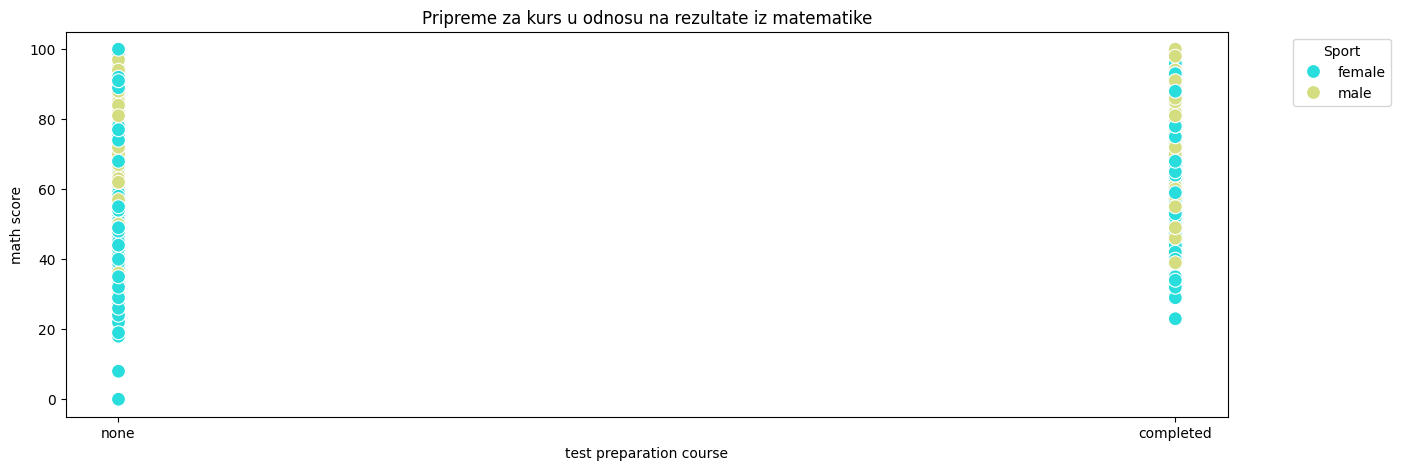

In [65]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='test preparation course', y='math score',data=df, hue='gender', palette = 'rainbow', s=100)
plt.title('Pripreme za kurs u odnosu na rezultate iz matematike')
plt.xlabel('test preparation course')
plt.ylabel('math score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Gender')
plt.show()

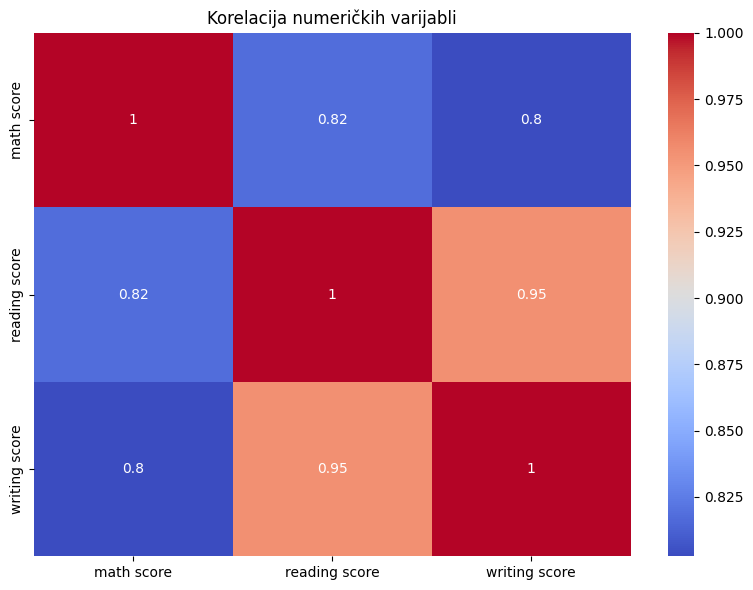

In [66]:
salary_corr = df[['math score','reading score','writing score']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(salary_corr, annot=True, cmap='coolwarm')
plt.title("Korelacija numeričkih varijabli")
plt.tight_layout()
plt.show()

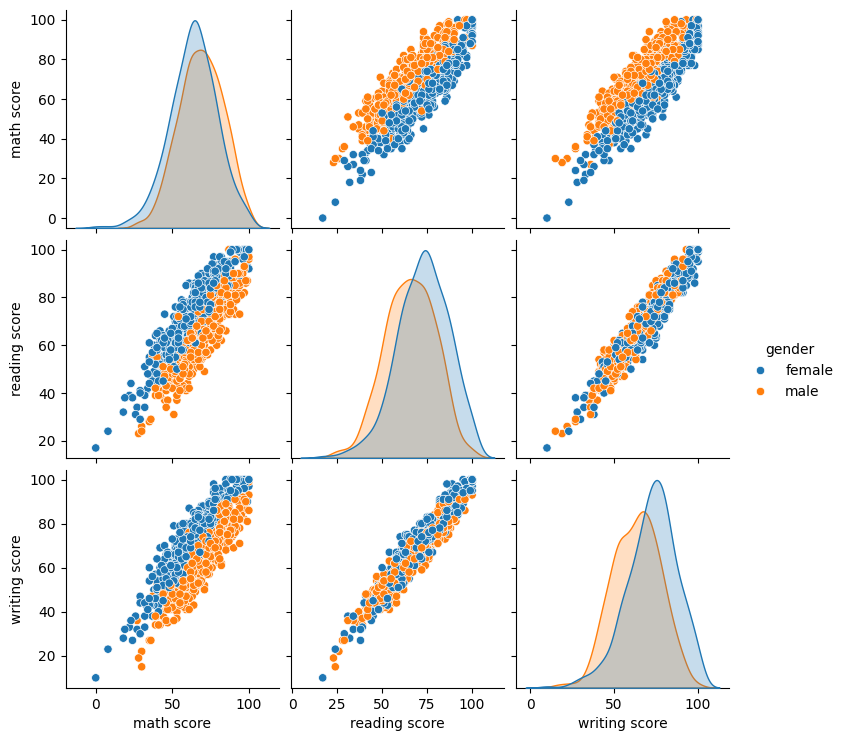

In [67]:
sns.pairplot(df, vars=["math score", "reading score", "writing score"], hue="gender")
plt.show()

<Axes: >

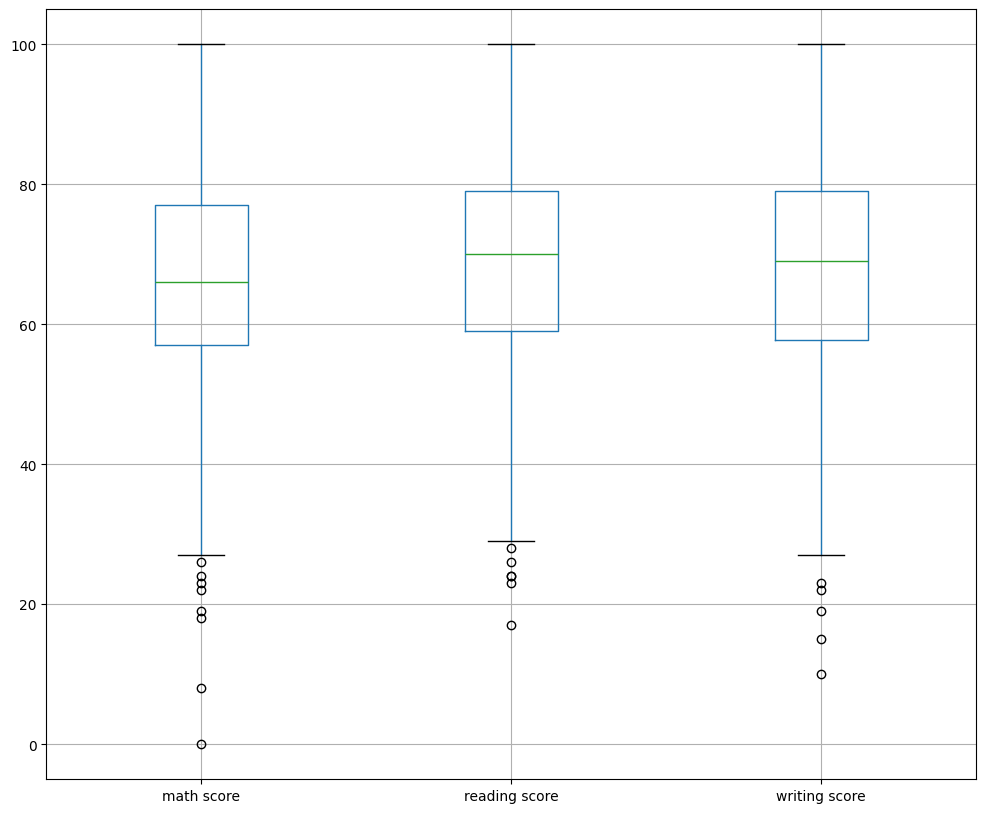

In [68]:
df.boxplot(figsize=(12, 10))

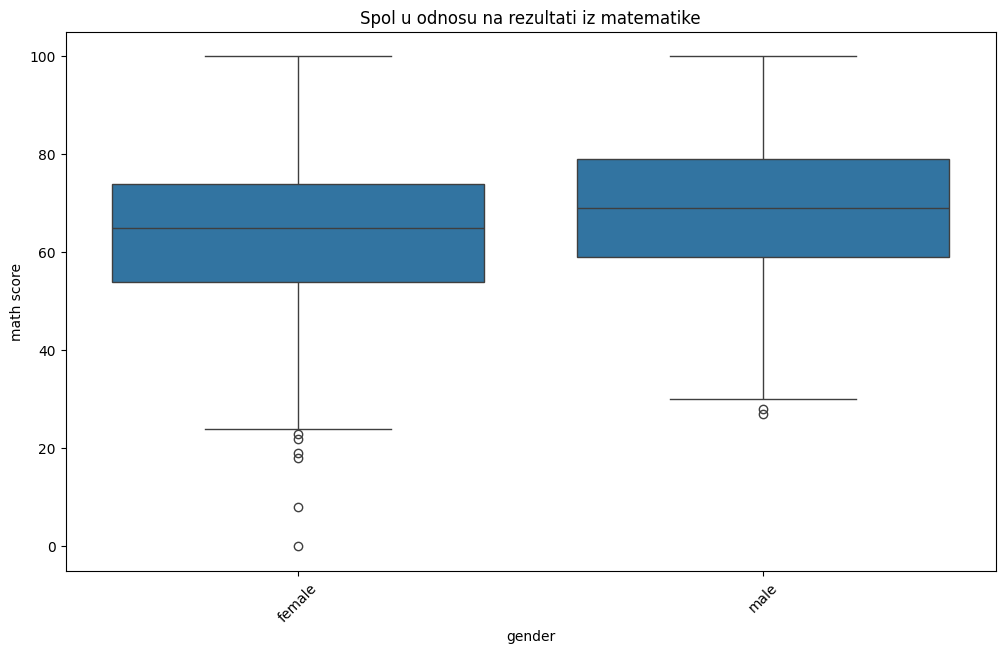

In [69]:
plt.figure(figsize=(12,7))
sns.boxplot(x='gender', y='math score',data=df)
plt.title('Spol u odnosu na rezultati iz matematike')
plt.xlabel('gender')
plt.ylabel('math score')
plt.xticks(rotation=45)
plt.show()

In [70]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['math score'] >= lower_bound) & (df['math score'] <= upper_bound)]

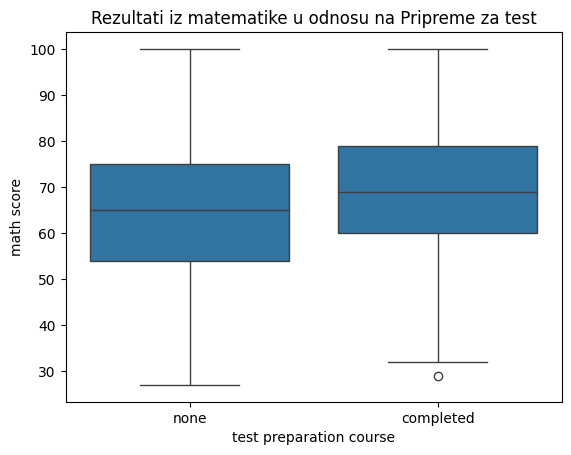

In [71]:
sns.boxplot(x="test preparation course", y="math score", data=df)
plt.title("Rezultati iz matematike u odnosu na Pripreme za test")
plt.show()

In [72]:
X = df.drop("math score", axis=1)
y = df["math score"]

categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [73]:
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

In [76]:
results_no_tuning = []
preds_no_tuning = {}

for name, model in models.items():
    pipe = Pipeline([("pre", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    preds_no_tuning[name] = preds
    results_no_tuning.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    })
df_no_tuning = pd.DataFrame(results_no_tuning).sort_values(by="R2", ascending=False)

print("Evaluation WITHOUT Tuning")
print(df_no_tuning)

Evaluation WITHOUT Tuning
              Model       MAE      RMSE        R2
0  LinearRegression  4.085098  5.087236  0.886912
1             Ridge  4.095243  5.092712  0.886668
4  GradientBoosting  4.372397  5.457630  0.869845
3      RandomForest  4.505586  5.567553  0.864549
2             Lasso  4.986176  6.335080  0.824629
5               SVR  5.414422  7.125983  0.778107


In [77]:
tuned_models = {
    "Ridge": {
        "model": Ridge(),
        "params": {"model__alpha": [0.1, 1.0, 10.0]}
    },
    "Lasso": {
        "model": Lasso(),
        "params": {"model__alpha": [0.001, 0.01, 0.1, 1.0]}
    },
    "SVR": {
        "model": SVR(),
        "params": {"model__C": [0.1, 1, 10], "model__gamma": ["scale", "auto"]}
    },
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {"model__n_estimators": [100, 200], "model__max_depth": [None, 10, 20]}
        },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {"model__n_estimators": [100, 200], "model__learning_rate": [0.05, 0.1], "model__max_depth": [3, 5]}
    }
}

In [78]:
# Tuning (ili "fine-tuning") je proces podešavanja hiperparametara modela
# kako bi on radio što bolje na određenom skupu podataka.
results_tuned = []
best_estimators = {}

for name, mp in tuned_models.items():
    pipe = Pipeline([("pre", preprocessor), ("model", mp["model"])])
    grid = GridSearchCV(pipe, mp["params"], cv=5, scoring="r2", n_jobs=-1)
    grid.fit(X_train, y_train)
    preds = grid.predict(X_test)
    best_estimators[name] = grid.best_estimator_
    results_tuned.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds),
        "Best Params": grid.best_params_
    })

df_tuned = pd.DataFrame(results_tuned).sort_values(by="R2", ascending=False)

print("\nEvaluation WITH Tuning")
print(df_tuned)


Evaluation WITH Tuning
              Model       MAE      RMSE        R2  \
0             Ridge  4.095243  5.092712  0.886668   
1             Lasso  4.097331  5.094180  0.886603   
2               SVR  4.368283  5.385760  0.873250   
4  GradientBoosting  4.372397  5.457630  0.869845   
3      RandomForest  4.496842  5.547891  0.865504   

                                         Best Params  
0                              {'model__alpha': 1.0}  
1                             {'model__alpha': 0.01}  
2           {'model__C': 10, 'model__gamma': 'auto'}  
4  {'model__learning_rate': 0.1, 'model__max_dept...  
3  {'model__max_depth': 10, 'model__n_estimators'...  


In [79]:
comparison_df = pd.merge(
    df_no_tuning,
    df_tuned.drop(columns=["Best Params"]),  
    on="Model",
    suffixes=("_NoTuning", "_Tuned")
)

comparison_df = comparison_df.sort_values(by="R2_Tuned", ascending=False)

print("Comparison of Models: No Tuning vs With Tuning\n")
print(comparison_df)

Comparison of Models: No Tuning vs With Tuning

              Model  MAE_NoTuning  RMSE_NoTuning  R2_NoTuning  MAE_Tuned  \
0             Ridge      4.095243       5.092712     0.886668   4.095243   
3             Lasso      4.986176       6.335080     0.824629   4.097331   
4               SVR      5.414422       7.125983     0.778107   4.368283   
1  GradientBoosting      4.372397       5.457630     0.869845   4.372397   
2      RandomForest      4.505586       5.567553     0.864549   4.496842   

   RMSE_Tuned  R2_Tuned  
0    5.092712  0.886668  
3    5.094180  0.886603  
4    5.385760  0.873250  
1    5.457630  0.869845  
2    5.547891  0.865504  


In [80]:
best_model_no_tuning_name = df_no_tuning.iloc[0]["Model"]
best_model_tuned_name = df_tuned.iloc[0]["Model"]

best_model_no_tuning = Pipeline([("pre", preprocessor), ("model", models[best_model_no_tuning_name])])
best_model_no_tuning.fit(X_train, y_train)

best_model_tuned = best_estimators[best_model_tuned_name]

preds_no = best_model_no_tuning.predict(X_test)
preds_tuned = best_model_tuned.predict(X_test)

compare_preds = pd.DataFrame({
    "Actual": y_test.values,
    f"Predicted_{best_model_no_tuning_name}_NoTuning": preds_no.round(2),
    f"Predicted_{best_model_tuned_name}_Tuned": preds_tuned.round(2)
})
print("FOR MATH SCORE...")
print(compare_preds.head(15))

FOR MATH SCORE...
    Actual  Predicted_LinearRegression_NoTuning  Predicted_Ridge_Tuned
0       83                                77.90                  77.87
1       83                                85.84                  85.80
2       68                                73.27                  73.30
3       67                                67.98                  67.93
4       65                                65.79                  65.80
5       75                                71.07                  71.04
6       70                                64.19                  64.27
7       70                                63.90                  63.80
8       39                                39.62                  39.71
9       64                                52.25                  52.36
10      27                                24.43                  24.54
11      81                                78.72                  78.62
12      41                                39.21            

In [81]:
X_train_transformed = pipe.named_steps['pre'].transform(X_train)
X_test_transformed = pipe.named_steps["pre"].transform(X_test)

encoder = pipe.named_steps['pre'].named_transformers_['cat']
cat_feature_names = encoder.get_feature_names_out(categorical_cols)


In [82]:
cat_f = [i for i in X_train if X_train[i].dtype == "object"]
encoder = pipe.named_steps['pre'].named_transformers_['cat']
cat_feature_names = encoder.get_feature_names_out(cat_f)
cols= [i for i in cat_feature_names]
cols.extend(["reading_score","writing_score"])

In [83]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=cols)


PermutationExplainer explainer: 794it [01:09, 10.40it/s]                         


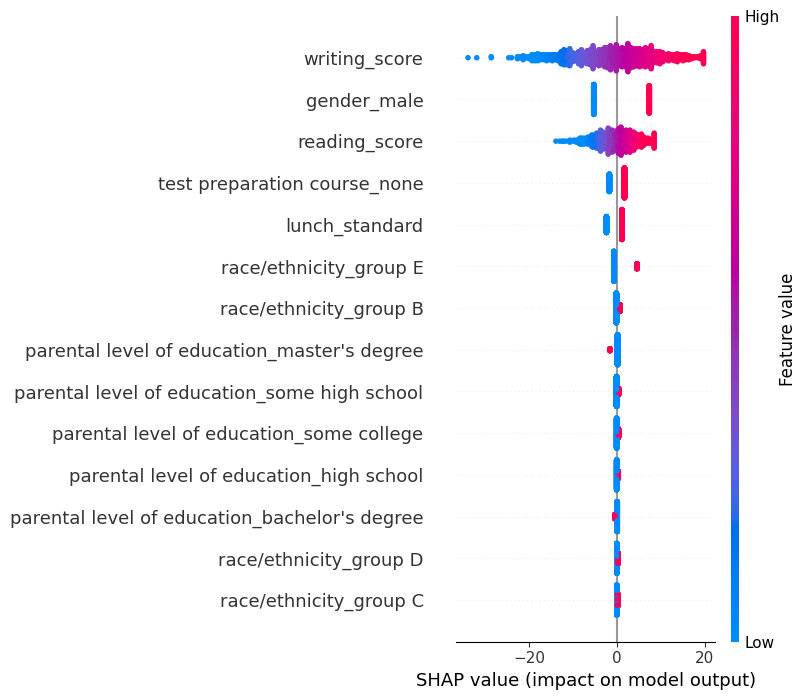

In [84]:
model = Ridge(alpha=1).fit(X_train_transformed,y_train)
model.predict(X_test_transformed)
explainer = shap.Explainer(model.predict,X_train_transformed)
shap_values = explainer(X_train_transformed)
shap.summary_plot(shap_values)
# Koja kolona ima najviši uticaj
# Što je više ka crvenom to su veće šanse da će imati veći math score